## tensorflow

In [ ]:
import numpy.matlib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import math
import time
import keras
import random
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
import tensorflow.keras.optimizers as optim
from tensorflow.keras import datasets, layers, models


In [ ]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(layers.Flatten(name="flattenlayer"))
model.add(layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(layers.Dense(10))

In [ ]:
classes = ['0','1','2','3','4','5','6','7','8','9']
colors = ListedColormap(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", 
          "tab:olive", "tab:cyan"])

In [ ]:
model.compile(optimizer=optim.SGD(learning_rate=1e-6),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(Xtr, Ltr, epochs=1, 
                    validation_data=(X_test, L_test))
extractor = keras.Model(inputs=model.inputs,
                        outputs=model.get_layer(name="flattenlayer").output)

1875/1875 [==============================] - 68s 36ms/step - loss: 7.9999 - accuracy: 0.1919 - val_loss: 4.5485 - val_accuracy: 0.2935


In [ ]:
out = extractor.predict(Xtr)

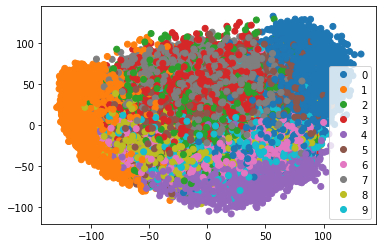

In [ ]:
pca = PCA(n_components=2)
pca.fit(out)

transformed_data = pca.transform(out)
# print(transformed_data[0])

scatter = plt.scatter(x=transformed_data[:, 0,], y=transformed_data[:, 1], c=Ltr, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


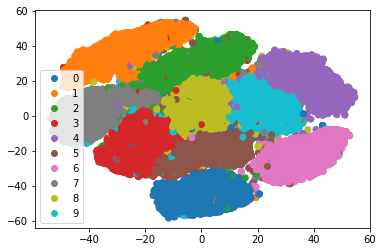

In [ ]:
transformed_data = TSNE(n_components=2).fit_transform(out)


scatter = plt.scatter(x=transformed_data[:, 0,], y=transformed_data[:, 1], c=Ltr, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

# 20 Epochs


In [ ]:
model.compile(optimizer=optim.SGD(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(Xtr, Ltr, epochs=20, 
                    validation_data=(X_test, L_test))
extractor = keras.Model(inputs=model.inputs,
                        outputs=model.get_layer(name="flattenlayer").output)

Epoch 1/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3293 - accuracy: 0.9144 - val_loss: 0.1336 - val_accuracy: 0.9586
Epoch 2/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1072 - accuracy: 0.9668 - val_loss: 0.0982 - val_accuracy: 0.9706
Epoch 3/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0772 - accuracy: 0.9767 - val_loss: 0.0732 - val_accuracy: 0.9774
Epoch 4/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0628 - accuracy: 0.9809 - val_loss: 0.0628 - val_accuracy: 0.9804
Epoch 5/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0543 - accuracy: 0.9834 - val_loss: 0.0637 - val_accuracy: 0.9805
Epoch 6/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0461 - accuracy: 0.9861 - val_loss: 0.0615 - val_accuracy: 0.9818
Epoch 7/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.0538 -

In [ ]:
out = extractor.predict(Xtr)

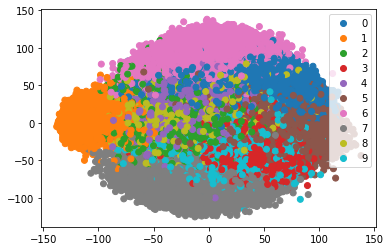

In [ ]:
pca = PCA(n_components=2)
pca.fit(out)

transformed_data = pca.transform(out)

scatter = plt.scatter(x=transformed_data[:, 0,], y=transformed_data[:, 1], c=Ltr, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


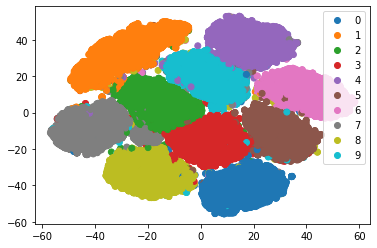

In [ ]:
transformed_data = TSNE(n_components=2).fit_transform(out)

scatter = plt.scatter(x=transformed_data[:, 0,], y=transformed_data[:, 1], c=Ltr, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()